# Logistic Regression, Decision Trees and Random forests with Scikit-Learn

 - This Notebook details the data analysis and model building using data provided. For details see the accompanying file: "Task_outline".

 - Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # this for splitting the data into training and testing set.
from sklearn.feature_selection import chi2 # for the chi-squared test

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import seaborn as sns

 - import training data

In [2]:
raw_train_df = pd.read_csv('train.csv')
raw_train_df.head()

,parent.batch.id,dyehouse.code,dyelot.year,dyelot.month,dyelot.week,dyelot.day,batch.id,shade.name,substrate.code,count.ply,...,max.colour.difference,Article2,Ticket,Shade.name2,fibre.char,dyetype,subdetail,shadedepth,supplier,extra
0,2363957,VN_HAN,2017,1,1,3,2366025,037UR,PPC,125x2,...,NaN,2994,120.0,037UR,2T,E,P,P,G,NaN
1,2364056,VN_HAN,2017,1,1,3,2366026,10DUQ,PPC,205x2,...,NaN,2993,80.0,10DUQ,2D,D,P,D,G,V
2,2364206,VN_HAN,2017,1,1,3,2366029,COM0301F,SSP,40x2,...,NaN,8090,120.0,0301F,2O,E,N,M,G,NaN
3,2364578,VN_HAN,2017,1,1,6,2368388,28VPN,IBP,275x3,...,NaN,UI09,30.0,28VPN,3D,W,N,D,G,NaN
4,2364717,VN_HAN,2017,1,1,3,2366027,EUR08529,PPC,205x3,...,NaN,2920,50.0,8529,3D,E,P,P,G,NaN


Retrieve the pass/fail status from train.output.

In [3]:
train_output_df = pd.read_csv('train.output.csv') # load train.output
status = train_output_df['has.passed'] # assign status as "has.passed" column.

 - Place the pass/fail status as the first column

In [4]:
train_df = pd.concat([status,raw_train_df],axis=1) # prepend the status column to raw data to produce train_df data frame.
train_df.head()

,has.passed,parent.batch.id,dyehouse.code,dyelot.year,dyelot.month,dyelot.week,dyelot.day,batch.id,shade.name,substrate.code,...,max.colour.difference,Article2,Ticket,Shade.name2,fibre.char,dyetype,subdetail,shadedepth,supplier,extra
0,0,2363957,VN_HAN,2017,1,1,3,2366025,037UR,PPC,...,NaN,2994,120.0,037UR,2T,E,P,P,G,NaN
1,1,2364056,VN_HAN,2017,1,1,3,2366026,10DUQ,PPC,...,NaN,2993,80.0,10DUQ,2D,D,P,D,G,V
2,1,2364206,VN_HAN,2017,1,1,3,2366029,COM0301F,SSP,...,NaN,8090,120.0,0301F,2O,E,N,M,G,NaN
3,1,2364578,VN_HAN,2017,1,1,6,2368388,28VPN,IBP,...,NaN,UI09,30.0,28VPN,3D,W,N,D,G,NaN
4,1,2364717,VN_HAN,2017,1,1,3,2366027,EUR08529,PPC,...,NaN,2920,50.0,8529,3D,E,P,P,G,NaN


In [5]:
train_df.shape # check the shape of the data frame 

(13934, 68)

# Feature Selection

 - Remove some features that we think prcatically do not influence the fail/pass outcome of the dyeing process.

In [6]:

train_df = train_df.drop_duplicates() # remove repeated copies
train_df = train_df.drop(columns = [
    'dyelot.year', # beacuse the model we are building should wrok for subsequent years
    'recipe.type', # they are all default
    'lub.type.name', # they are all the same.
    'batch.weight.band', # do not need the band just the weights
    'dyelot.date', # we dont know what this is
    'recipe.type.code', # all the same.
    'triangle.code.1',
    'triangle.code.2',
    'dyehouse.code', # not needed.
    'stage.1.dye.conc.band', # do not need the band just the concentrations.
    'stage.1.dispense.wt.band', # 
    'substrate.used.for', # All the same.
    'L.value', # 
    'A.value', # 
    'B.value', # 
    'chroma.value', #
    'hue.value',
    'delta.l',
    'delta.c',
    'delta.h',
    'max.colour.difference',
    'Article2', #  no information provided.
    'Ticket',   # no information provided
    'Shade.name2', # no information provided
    'fibre.char',  # no information provided
    'subdetail', # no information provided
    'shadedepth', # not enough information
    'extra'  ,    # not enough information
    'dyelot.day', # do not need the day as a feature
    'dyelot.week', # do not need the week as a feature.
    
    
    
]) 

train_df.head()

,has.passed,parent.batch.id,dyelot.month,batch.id,shade.name,substrate.code,count.ply,fibre.type,unfinished.standard.type,recipe.status,...,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,group.55,machine.manufacturer,machine.model,fibre.mix,thread.group,dyetype,supplier
0,0,2363957,1,2366025,037UR,PPC,125x2,PPCA01252TD95R,DTMHN-PPC,1ST LAB TO BULK,...,0.0035,0.0,0.10535,27,Longclose,ES 22,100,PPC-125X2-TEIJIN (MICRO),E,G
1,1,2364056,1,2366026,10DUQ,PPC,205x2,PPCA02052DP95R,DTMHN-PPC,WAITING PROVEN,...,0.0935,0.0,2.81435,64,Ugolini,SP Mix/4P,100,PPC-ZNG-M,D,G
2,1,2364206,1,2366029,COM0301F,SSP,40x2,SSPC01302O495R,COMETA-SSP,ADJUSTED 50%,...,0.0130,0.0,2.60130,28,Fong's,ES22,100,SSP-FEN-F,E,G
3,1,2364578,1,2368388,28VPN,IBP,275x3,IBPA02753DJ95P,DTMHN-IBP,SAVED BY ARC,...,0.0000,0.0,0.00000,37,Ugolini,GS36R/1P,100,IBP-ZNG-C,W,G
4,1,2364717,1,2366027,EUR08529,PPC,205x3,PPCA02053DD95R,EURO-PPC,1ST LAB TO BULK,...,0.0104,0.0,0.62608,30,Thies,ES21 350/12,100,PPC-ZNG-M,E,G


In [7]:
train_df.shape # check if duplicates have been dropped and some features removed.

(13750, 38)

In [8]:
train_df.iloc[0] # check the features we have kept so far

has.passed                                                   0
parent.batch.id                                        2363957
dyelot.month                                                 1
batch.id                                               2366025
shade.name                                               037UR
substrate.code                                             PPC
count.ply                                                125x2
fibre.type                                      PPCA01252TD95R
unfinished.standard.type                             DTMHN-PPC
recipe.status                                  1ST LAB TO BULK
dyeing.method                                              101
machine.name                                          DYE004_Q
machine.volume                                              21
total.no.of.cheeses                                          3
total.batch.weight                                        3.01
dyeclasses                                             

 # Visualize the distribution of pass/fail in each categorical data
  - Here we would like to conduct some visual observation of the distribution of pass/fail in each categorical data.

In [9]:
variable = 'machine.manufacturer' # choose a categorical feature as an example.
pd.DataFrame(train_df[variable].value_counts(normalize = False)).head()

,machine.manufacturer
Ugolini,9578
Thies,2899
Fong's,613
Longclose,545


 - Plot a normalized frequency density of the feature.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

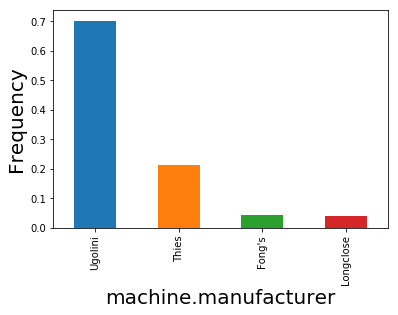

In [11]:
axes = train_df[variable].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel(variable)
plt.ylabel('Frequency')
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.xticks(fontsize= 10)

 - Create a Dummy data that cotains the selected feature "variable" and the corresponding status of the batch i.e. pass/fail.

In [12]:
dummy_data = train_df[['batch.id','has.passed', variable]]
dummy_data.head()

,batch.id,has.passed,machine.manufacturer
0,2366025,0,Longclose
1,2366026,1,Ugolini
2,2366029,1,Fong's
3,2368388,1,Ugolini
4,2366027,1,Thies


 - Group the data by the variable and inspect the frequency of pass and fail.

In [13]:
dummy_data_grouped_df = dummy_data.groupby([variable, 'has.passed']).agg(
    {'batch.id':'nunique'}
).reset_index().rename(columns = {'batch.id': 'frequency'})

dummy_data_grouped_df.head()

,machine.manufacturer,has.passed,frequency
0,Fong's,0,126
1,Fong's,1,487
2,Longclose,0,114
3,Longclose,1,431
4,Thies,0,465


 - Compute the frequency(i.e.  occurence of pass/fail) as a percentage of the total frequency within each group.

In [14]:
freq_density = dummy_data_grouped_df['frequency'] / dummy_data_grouped_df.groupby(variable)['frequency'].transform('sum')

In [15]:
dummy_data_grouped_df['frequency_density'] = freq_density
dummy_data_grouped_df['percentage'] = freq_density*100
dummy_data_grouped_df.head()

,machine.manufacturer,has.passed,frequency,frequency_density,percentage
0,Fong's,0,126,0.205546,20.554649
1,Fong's,1,487,0.794454,79.445351
2,Longclose,0,114,0.209174,20.917431
3,Longclose,1,431,0.790826,79.082569
4,Thies,0,465,0.160400,16.040014


 - Visualze the percentage of pass and fail for each group. This allows us to inspect visually if certain cetegories have a higher fail rate.

<function matplotlib.pyplot.show(*args, **kw)>

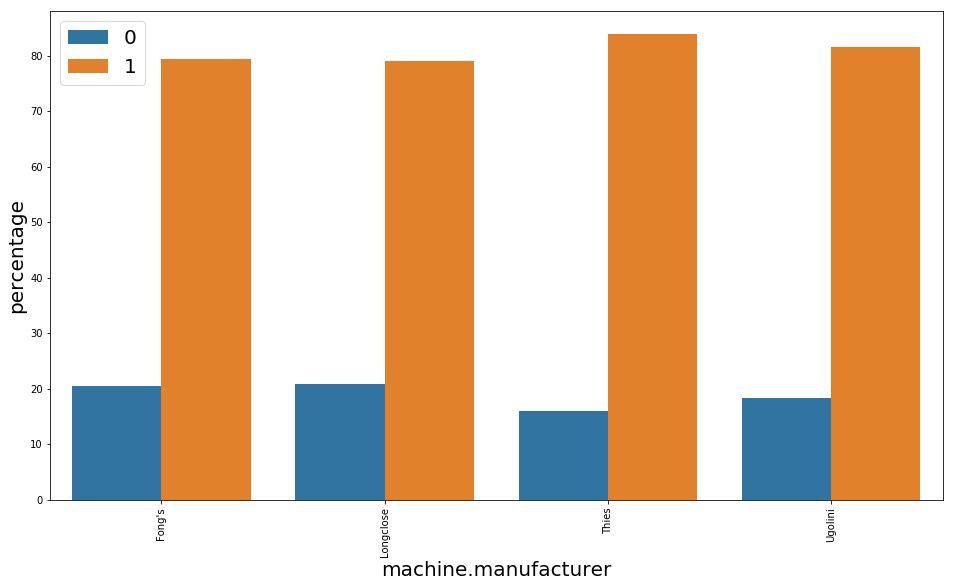

In [16]:
plt.rcParams["figure.figsize"]= 16,9
axes = sns.barplot(x = variable, y = 'percentage', hue = 'has.passed', data = dummy_data_grouped_df)
plt.xticks(rotation = 90)

axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.xticks(fontsize= 10)
plt.legend(fontsize = 20)

plt.show

 - Drop some features after assessing their corresponding pass/fail percentage in each category.
 - If all categories in a given feature had more or less the same pass/fail percentage, then the inclusion of that feature was questioned.

In [17]:
train_df = train_df.drop(columns = [

    'shade.name', # not enough data for each category.
    'machine.manufacturer', # pass/fail rate more morless the same for all categories
    'material.code', # not enough data for each category
    'dye.code.4',
    'dye.code.5',
    'dye.code.6',
    'fastness.type',    
    'dyelot.month', # pass/fail rate more or less the same for all categories.
    #'dyetype',
]) 

train_df.head()

,has.passed,parent.batch.id,batch.id,substrate.code,count.ply,fibre.type,unfinished.standard.type,recipe.status,dyeing.method,machine.name,...,redye.flag,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,group.55,machine.model,fibre.mix,thread.group,dyetype,supplier
0,0,2363957,2366025,PPC,125x2,PPCA01252TD95R,DTMHN-PPC,1ST LAB TO BULK,101,DYE004_Q,...,R1,0.0035,0.0,0.10535,27,ES 22,100,PPC-125X2-TEIJIN (MICRO),E,G
1,1,2364056,2366026,PPC,205x2,PPCA02052DP95R,DTMHN-PPC,WAITING PROVEN,59,DYE004_L,...,R1,0.0935,0.0,2.81435,64,SP Mix/4P,100,PPC-ZNG-M,D,G
2,1,2364206,2366029,SSP,40x2,SSPC01302O495R,COMETA-SSP,ADJUSTED 50%,106,DYE036_A,...,R1,0.0130,0.0,2.60130,28,ES22,100,SSP-FEN-F,E,G
3,1,2364578,2368388,IBP,275x3,IBPA02753DJ95P,DTMHN-IBP,SAVED BY ARC,58,DYE036_F,...,R1,0.0000,0.0,0.00000,37,GS36R/1P,100,IBP-ZNG-C,W,G
4,1,2364717,2366027,PPC,205x3,PPCA02053DD95R,EURO-PPC,1ST LAB TO BULK,101,DYE010_C,...,R1,0.0104,0.0,0.62608,30,ES21 350/12,100,PPC-ZNG-M,E,G


In [18]:
train_df.iloc[0]

has.passed                                                   0
parent.batch.id                                        2363957
batch.id                                               2366025
substrate.code                                             PPC
count.ply                                                125x2
fibre.type                                      PPCA01252TD95R
unfinished.standard.type                             DTMHN-PPC
recipe.status                                  1ST LAB TO BULK
dyeing.method                                              101
machine.name                                          DYE004_Q
machine.volume                                              21
total.no.of.cheeses                                          3
total.batch.weight                                        3.01
dyeclasses                                             PPCEPPG
colour.category                                        DEFAULT
thread.quality                                         

In [19]:
# create dummies for all the features that are strings.

train_string_df = pd.get_dummies(train_df[[
    'parent.batch.id',
    'batch.id',
    #'dyelot.month',
    #'shade.name',
    'substrate.code',
    'fibre.type',
    'unfinished.standard.type',
    'recipe.status',
    'dyeing.method',
    'machine.name',
    'dyeclasses',
    'colour.category',
    'thread.quality',
    #'material.code',
    'dye.code.1',
    'dye.code.2',
    'dye.code.3',
    #'dye.code.4',
    #'dye.code.5',
    #'dye.code.6',
    'finish.type',
    #'fastness.type',
    'redye.flag',
   # 'machine.manufacturer',
    'machine.model',
    'fibre.mix',
    'thread.group',
    'dyetype',
    'supplier', 
    'group.55'
]], columns = [
    # 'dyelot.month',
    #'shade.name',
    'substrate.code',
    'fibre.type',
    'unfinished.standard.type',
    'recipe.status',
    'dyeing.method',
    'machine.name',
    'dyeclasses',
    'colour.category',
    'thread.quality',
    #'material.code',
    'dye.code.1',
    'dye.code.2',
    'dye.code.3',
    #'dye.code.4',
    #'dye.code.5',
    #'dye.code.6',
    'finish.type',
    #'fastness.type',
    'redye.flag',
    #'machine.manufacturer',
    'machine.model',
    'fibre.mix',
    'thread.group',
    'dyetype',
    'supplier',
    'group.55'
])

train_string_df.head()

,parent.batch.id,batch.id,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,substrate.code_IBP,substrate.code_MFP,substrate.code_PBT,...,group.55_60,group.55_63,group.55_64,group.55_65,group.55_66,group.55_67,group.55_68,group.55_69,group.55_71,group.55_72
0,2363957,2366025,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2364056,2366026,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2364206,2366029,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2364578,2368388,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2364717,2366027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - Remove the batch_id and parent.batch.id to obtain a data set containing all categorical data.

In [20]:

train_string_df = train_string_df.drop(columns = [
    'batch.id',
    'parent.batch.id',   
]) 

train_string_df.head()

,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,substrate.code_IBP,substrate.code_MFP,substrate.code_PBT,substrate.code_PCC,substrate.code_PPC,...,group.55_60,group.55_63,group.55_64,group.55_65,group.55_66,group.55_67,group.55_68,group.55_69,group.55_71,group.55_72
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


 - Obtain a data frame consisting of all numeric features.

In [21]:
train_numeric_df = train_df.drop(columns = [
    #'dyelot.month',
    #'shade.name', 
    'substrate.code',
    'count.ply',
    'fibre.type',
    'unfinished.standard.type',
    'recipe.status','dyeing.method',
    'machine.name',
    'dyeclasses',
    'colour.category',
    'thread.quality',
    #'material.code',
    'dye.code.1',
    'dye.code.2',
    'dye.code.3',
    #'dye.code.4',
    #'dye.code.5',
    #'dye.code.6',
    'finish.type',
    #'fastness.type',
    'redye.flag',
    #'machine.manufacturer',
    'machine.model',
    'fibre.mix',
    'thread.group',
    'dyetype',
    'supplier',
    'group.55',
    'batch.id',
    'parent.batch.id',
    'has.passed'
    
]) 

train_numeric_df.head()

,machine.volume,total.no.of.cheeses,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.
0,21.0,3,3.01,0.0035,0.0,0.10535
1,30.0,3,3.01,0.0935,0.0,2.81435
2,232.0,20,20.01,0.0130,0.0,2.60130
3,240.0,28,28.02,0.0000,0.0,0.00000
4,53.5,6,6.02,0.0104,0.0,0.62608


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

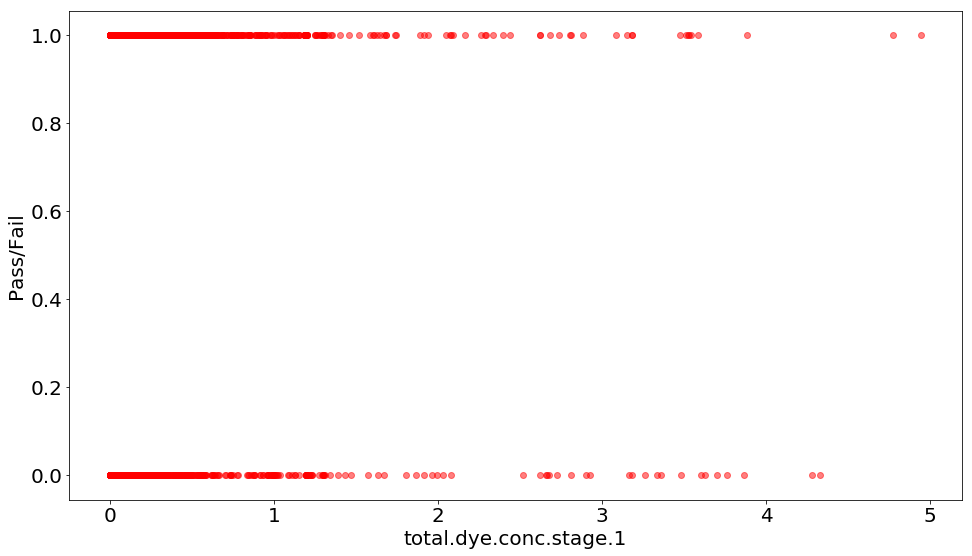

In [22]:
variable = 'total.dye.conc.stage.1'
axes = plt.scatter(train_numeric_df[variable], train_df['has.passed'], c="r", alpha=0.5, marker= 'o')
plt.xlabel(variable, size = 20)
plt.ylabel('Pass/Fail', size = 20)
 # axes.xaxis.label.set_size(20)
# axes.yaxis.label.set_size(20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


 # Feature selection for numeric data and categoric data using $\chi^2$ statistics.

- Here we employ a more quantitative approach to feaure selection using $\chi^2$-Statistics on the numerical features and categorical features to assess relationship between outcome and  features. 

 - Assess $\chi^2$ statistics for numeric data first. 

In [23]:
numeric_chi_scores = chi2(train_numeric_df,train_df['has.passed']) # chi squared statistics on numeric data
numeric_chi_scores

(array([ 4653.1470966 ,   272.38741413,   209.6503125 ,    58.43326547,
          144.36238943, 24218.53450777]),
 array([0.00000000e+00, 3.42445190e-61, 1.63741212e-47, 2.10304844e-14,
        2.96046891e-33, 0.00000000e+00]))

 - Extract the p-value and visialize them in a bar chart.

In [24]:
p_values_numeric = pd.Series(numeric_chi_scores[1],index = train_numeric_df.columns) # extract the p_values
p_values_numeric.sort_values(ascending = False , inplace = True) # sort the P_values in descending order.
p_values_numeric # check the p_values for numeric features.

total.dye.conc.stage.1                2.103048e-14
total.dye.conc.stage.2                2.960469e-33
total.batch.weight                    1.637412e-47
total.no.of.cheeses                   3.424452e-61
weight.of.stage.1.dye.dispense..g.    0.000000e+00
machine.volume                        0.000000e+00
dtype: float64

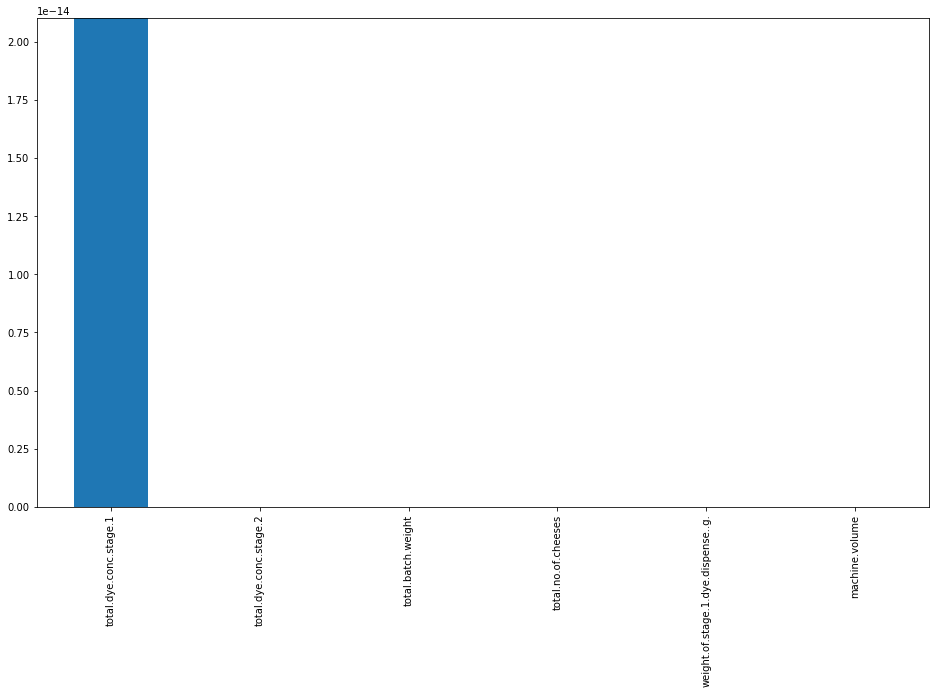

In [25]:
p_values_numeric.plot.bar() # plot a bar chart to visualize.

- The  p-value of all numeric features are smaller than the significance level of 0.05. It is an indication that all the numeric features should be retained for the model.

 - We plot a scatter matrix to visualize correlation between numeric features. 

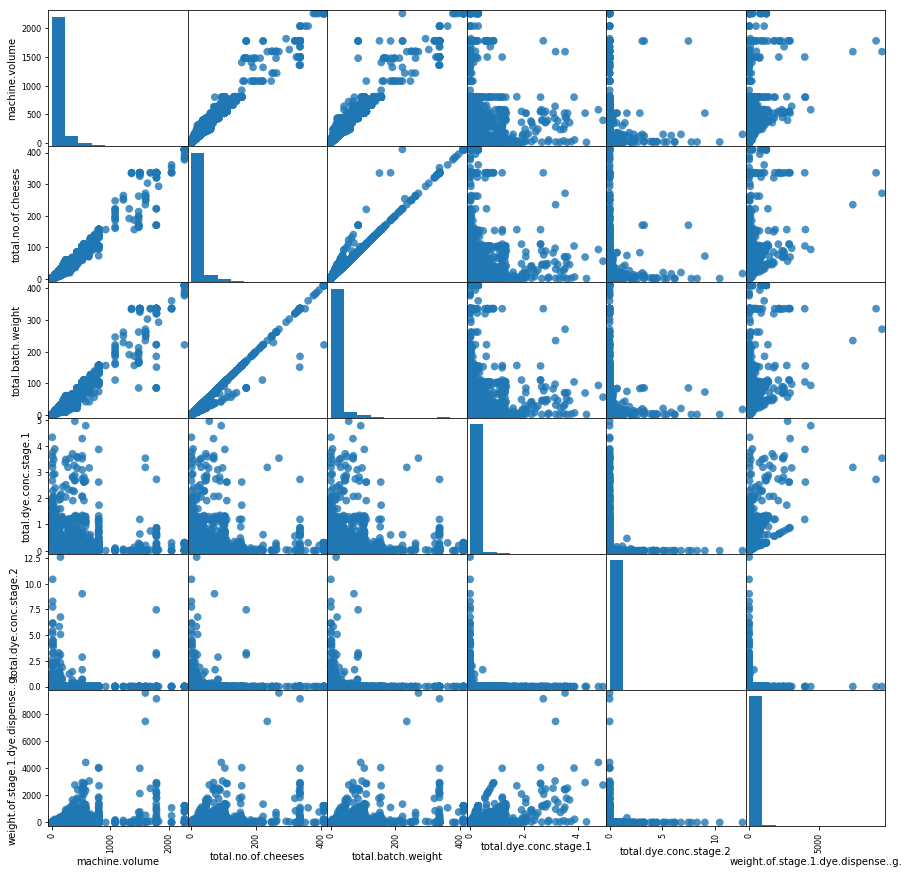

In [26]:
pd.plotting.scatter_matrix(train_numeric_df, figsize = (15,15), marker = 'o', s = 60, alpha = 0.8)
plt.show()

- Total.no.of.cheeses and total.batch.weight seems heavily correlated. One of these variables can be removed from the feature selection.

In [27]:
# Remove total.no.of.cheeses

train_numeric_df = train_numeric_df.drop(columns = ['total.no.of.cheeses']) 
train_numeric_df.head()

,machine.volume,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.
0,21.0,3.01,0.0035,0.0,0.10535
1,30.0,3.01,0.0935,0.0,2.81435
2,232.0,20.01,0.0130,0.0,2.60130
3,240.0,28.02,0.0000,0.0,0.00000
4,53.5,6.02,0.0104,0.0,0.62608


 -  Let us now perform a $\chi^2$ statistics on categorical features.

In [28]:
string_chi_scores = chi2(train_string_df,train_df['has.passed'])
string_chi_scores

(array([ 0.60505933, 11.28716824,  0.10250068, ...,  9.96054017,
        21.72728269, 32.60887085]),
 array([4.36654146e-01, 7.80446309e-04, 7.48849108e-01, ...,
        1.59931124e-03, 3.14289574e-06, 1.12699195e-08]))

In [29]:
p_values_categoric = pd.Series(string_chi_scores[1],index = train_string_df.columns)
p_values_categoric.sort_values(ascending = False , inplace = True)

In [30]:
# check which features have a corresponding p-value bigger than the significance level.
p_values_categoric.loc[ (p_values_categoric > 0.05)] 

dyeclasses_PPCEPDG                       0.999055
machine.name_DYE012_S                    0.998932
dyeing.method_480                        0.998932
machine.name_DYE004D3                    0.994291
unfinished.standard.type_GCR-CFP         0.994291
dye.code.1_52103100                      0.994291
dye.code.1_52100118                      0.994291
dye.code.2_52103250                      0.991927
machine.model_SP MINIS/8P                0.987434
dyeing.method_830                        0.986974
dyeing.method_3211                       0.986974
machine.name_DYESM1_E                    0.985099
unfinished.standard.type_PPC-SSP         0.985099
machine.name_DYE004D2                    0.985099
dyeing.method_1061                       0.981398
unfinished.standard.type_ADIDAS-SSP      0.980218
dyeclasses_PPCDPWG                       0.978927
dye.code.2_52103247                      0.971794
dyeclasses_6FNTNWU                       0.970403
dye.code.3_52101542                      0.970403


 - Merge the numeric and catogoric data.

In [31]:
train_merged_df = train_numeric_df.join(train_string_df) 
train_merged_df.head()

,machine.volume,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,...,group.55_60,group.55_63,group.55_64,group.55_65,group.55_66,group.55_67,group.55_68,group.55_69,group.55_71,group.55_72
0,21.0,3.01,0.0035,0.0,0.10535,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,3.01,0.0935,0.0,2.81435,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,232.0,20.01,0.0130,0.0,2.60130,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240.0,28.02,0.0000,0.0,0.00000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53.5,6.02,0.0104,0.0,0.62608,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_merged_df.shape

(13750, 1682)

# Logistic Regression

 - Define a logistic regression function.

In [33]:
# Write a function to carry out Logistic Regression.
def LogisticRegression_run(X,y,c):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state = 150, stratify = y) 
    logreg = LogisticRegression(C = c).fit(X_train, y_train) # Linear regression on training data.
    print('Training set score: {:.2f}'. format(logreg.score(X_train, y_train))) # Pearson's correlation coefficient squared.
    print('Test set score: {:.2f}'. format(logreg.score(X_valid, y_valid))) # Pearson's correlation coefficient squared.
    print('predictions: {}'.format(pd.Series(logreg.predict(X_valid) ).value_counts() ) )  # count the number of time fail/pass is predicted 
    
    
    return X_train, y_train, X_valid, y_valid, logreg

In [34]:
# Logistic Regression and R^2 test.

X = train_merged_df
y = train_df['has.passed']

X_train, y_train, X_valid, y_valid, logreg = LogisticRegression_run(X,y,100)

C:\Users\fahee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.87
Test set score: 0.81
predictions: 1    3086
0     352
dtype: int64


 - Failure percentage in the training set

In [35]:
np.round( 100*pd.value_counts(y_train)[0]/(pd.value_counts(y_train)[0] + pd.value_counts(y_train)[1]) )

18.0

 - Failure percentage in the validation set

In [36]:
np.round ( 100*pd.value_counts(y_valid)[0]/(pd.value_counts(y_valid)[0] + pd.value_counts(y_valid)[1]) )

18.0

Failure percentage in the predicted set

In [37]:
status_predict_count = pd.Series(logreg.predict(X_valid) ).value_counts()  # compute the total pass/fail occurences.
np.round ( 100*status_predict_count[0]/(status_predict_count[0] + status_predict_count[1]) ) # Failure percentage.

10.0

 - Print out the model parameters

In [38]:
print('Model: parameters: ')
logreg.coef_ # estimation of the weights/coeffieincts in the Linear regression model.

Model: parameters: 


array([[-1.19571170e-03,  1.19759551e-02, -4.61308522e-01, ...,
        -4.06835225e+00,  1.20855856e+00, -1.15424822e+00]])

In [39]:
print('coefficient')
logreg.intercept_

coefficient


array([0.91200672])

 - Make a prediction using the test samples

In [40]:
y_predict_logistic = logreg.predict(X_valid)
print('status prediction:', y_predict_logistic)

print('status counts:', pd.value_counts(y_predict_logistic))

status prediction: [1 1 1 ... 1 1 1]
status counts: 1    3086
0     352
dtype: int64


 - probability of pass/fail for each batch int he validation set.

In [41]:
predict_prob = logreg.predict_proba(X_valid)
predict_prob

array([[0.01837059, 0.98162941],
       [0.08417316, 0.91582684],
       [0.02651288, 0.97348712],
       ...,
       [0.03791482, 0.96208518],
       [0.03520514, 0.96479486],
       [0.16589554, 0.83410446]])

 # Predict batch status and pass probability using logistic regression

 - Here we make use of the data provided in test.out to make some prediction.

 - upload the test.out data

In [42]:
raw_test_df = pd.read_csv('test.csv')
raw_test_df.head()

,parent.batch.id,failure.reason.group,dyehouse.code,dyelot.year,dyelot.month,dyelot.week,dyelot.day,batch.id,shade.name,substrate.code,...,max.colour.difference,Article2,Ticket,Shade.name2,fibre.char,dyetype,subdetail,shadedepth,supplier,extra
0,2363607,NO REASON GIVEN,VN_HAN,2017,1,1,6,2368714,CA87CDR,IBN,...,NaN,S654,20.0,87CDR,3H,T,N,M,L,NaN
1,2365458,NO REASON GIVEN,VN_HAN,2017,1,1,6,2368721,CA17CBR,IBN,...,NaN,S654,20.0,17CBR,3H,T,N,P,L,NaN
2,2365484,NO REASON GIVEN,VN_HAN,2017,1,1,4,2366654,EURD0998,PPC,...,NaN,2920,30.0,D0998,2D,E,P,M,G,NaN
3,2366050,NO REASON GIVEN,VN_HAN,2017,1,1,7,2370068,GCRC9700,SSP,...,0.63,8754,180.0,C9700,2P,D,N,D,G,V
4,2366543,NO REASON GIVEN,VN_HAN,2017,1,1,4,2367101,GCRC7929,PPC,...,1.45,2994,120.0,C7929,2T,E,P,V,G,NaN


In [43]:
test_df = raw_test_df.copy()
test_df.head()

,parent.batch.id,failure.reason.group,dyehouse.code,dyelot.year,dyelot.month,dyelot.week,dyelot.day,batch.id,shade.name,substrate.code,...,max.colour.difference,Article2,Ticket,Shade.name2,fibre.char,dyetype,subdetail,shadedepth,supplier,extra
0,2363607,NO REASON GIVEN,VN_HAN,2017,1,1,6,2368714,CA87CDR,IBN,...,NaN,S654,20.0,87CDR,3H,T,N,M,L,NaN
1,2365458,NO REASON GIVEN,VN_HAN,2017,1,1,6,2368721,CA17CBR,IBN,...,NaN,S654,20.0,17CBR,3H,T,N,P,L,NaN
2,2365484,NO REASON GIVEN,VN_HAN,2017,1,1,4,2366654,EURD0998,PPC,...,NaN,2920,30.0,D0998,2D,E,P,M,G,NaN
3,2366050,NO REASON GIVEN,VN_HAN,2017,1,1,7,2370068,GCRC9700,SSP,...,0.63,8754,180.0,C9700,2P,D,N,D,G,V
4,2366543,NO REASON GIVEN,VN_HAN,2017,1,1,4,2367101,GCRC7929,PPC,...,1.45,2994,120.0,C7929,2T,E,P,V,G,NaN


- Remove all features that were discraded in the training set.

In [44]:

test_df = test_df.drop(columns = [
    'dyelot.year', # beacuse the model we are building should wrok for subsequent years
    'recipe.type', # they are all default
    'lub.type.name', # they are all the same.
    'batch.weight.band', # do not need the band just the weights
    'dyelot.date', # we dont know what this is
    'recipe.type.code', # all the same.
    'triangle.code.1',
    'triangle.code.2',
    'dyehouse.code', # not needed.
    'stage.1.dye.conc.band', # do not need the band just the concentrations.
    'stage.1.dispense.wt.band', # 
    'substrate.used.for', # All the same.
    'L.value', # 
    'A.value', # 
    'B.value', # 
    'chroma.value', #
    'hue.value',
    'delta.l',
    'delta.c',
    'delta.h',
    'max.colour.difference',
    'Article2', #  no information provided.
    'Ticket',   # no information provided
    'Shade.name2', # no information provided
    'fibre.char',  # no information provided
    'subdetail', # no information provided
    'shadedepth', # not enough information
    'extra'  ,    # not enough information
    'dyelot.day', # do not need the day as a feature
    'dyelot.week', # do not need the week as a feature.
    
    
    
]) 

test_df.head()

,parent.batch.id,failure.reason.group,dyelot.month,batch.id,shade.name,substrate.code,count.ply,fibre.type,unfinished.standard.type,recipe.status,...,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,group.55,machine.manufacturer,machine.model,fibre.mix,thread.group,dyetype,supplier
0,2363607,NO REASON GIVEN,1,2368714,CA87CDR,IBN,470x3,IBNA04703HH95P,NYLON 6.6-CFN,PREDICT-REFINE,...,0.0159,0.0,0.87927,46,Ugolini,SP 110,100,IBN-470X3-HYOSUNG,T,L
1,2365458,NO REASON GIVEN,1,2368721,CA17CBR,IBN,470x3,IBNA04703HH95P,NYLON 6.6-CFN,SAVED BY ARC,...,0.0065,0.0,0.84565,30,Thies,ES21 500/36,100,IBN-470X3-HYOSUNG,T,L
2,2365484,NO REASON GIVEN,1,2366654,EURD0998,PPC,484x2,PPCA04842DP95R,EURO-PPC,ADJUSTED 50%,...,0.0000,0.0,0.00000,39,Ugolini,GS36R/1P,100,PPC-484X2-ZHONGTAI,E,G
3,2366050,NO REASON GIVEN,1,2370068,GCRC9700,SSP,90x2,SSPA00902P295R,GCR-SSP,WAITING PROVEN,...,0.0474,0.0,17.08296,55,Thies,ES21 eco bloc X 650 KB,100,SSP-FINE-T393 (INDO),D,G
4,2366543,NO REASON GIVEN,1,2367101,GCRC7929,PPC,125x2,PPCA01252TD95R,GCR-PPC,WAITING PROVEN,...,0.4761,0.0,61.89300,55,Thies,ES21 413/24,100,PPC-125X2-TEIJIN (MICRO),E,G


 - Also remove the following features that were also discraded in the training set after further feature selection.

In [45]:
test_df = test_df.drop(columns = [

    'shade.name', 
    'machine.manufacturer',
    'material.code',
    'dye.code.4',
    'dye.code.5',
    'dye.code.6',
    'fastness.type',    
    'dyelot.month', 
    #'dyetype',
]) 

test_df.head()

,parent.batch.id,failure.reason.group,batch.id,substrate.code,count.ply,fibre.type,unfinished.standard.type,recipe.status,dyeing.method,machine.name,...,redye.flag,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,group.55,machine.model,fibre.mix,thread.group,dyetype,supplier
0,2363607,NO REASON GIVEN,2368714,IBN,470x3,IBNA04703HH95P,NYLON 6.6-CFN,PREDICT-REFINE,541,DYE006_D,...,R1,0.0159,0.0,0.87927,46,SP 110,100,IBN-470X3-HYOSUNG,T,L
1,2365458,NO REASON GIVEN,2368721,IBN,470x3,IBNA04703HH95P,NYLON 6.6-CFN,SAVED BY ARC,536,DYE027_A,...,R1,0.0065,0.0,0.84565,30,ES21 500/36,100,IBN-470X3-HYOSUNG,T,L
2,2365484,NO REASON GIVEN,2366654,PPC,484x2,PPCA04842DP95R,EURO-PPC,ADJUSTED 50%,106,DYE036_E,...,R1,0.0000,0.0,0.00000,39,GS36R/1P,100,PPC-484X2-ZHONGTAI,E,G
3,2366050,NO REASON GIVEN,2370068,SSP,90x2,SSPA00902P295R,GCR-SSP,WAITING PROVEN,116,DYE060_A,...,R1,0.0474,0.0,17.08296,55,ES21 eco bloc X 650 KB,100,SSP-FINE-T393 (INDO),D,G
4,2366543,NO REASON GIVEN,2367101,PPC,125x2,PPCA01252TD95R,GCR-PPC,WAITING PROVEN,616,DYE020_A,...,R1,0.4761,0.0,61.89300,55,ES21 413/24,100,PPC-125X2-TEIJIN (MICRO),E,G


 - Obtain the categorical features.

In [46]:
# create dummies for all the features that are categorical.

test_string_df = pd.get_dummies(test_df[[
    'parent.batch.id',
    'batch.id',
    'failure.reason.group',
    #'dyelot.month',
    #'shade.name',
    'substrate.code',
    'fibre.type',
    'unfinished.standard.type',
    'recipe.status',
    'dyeing.method',
    'machine.name',
    'dyeclasses',
    'colour.category',
    'thread.quality',
    #'material.code',
    'dye.code.1',
    'dye.code.2',
    'dye.code.3',
    #'dye.code.4',
    #'dye.code.5',
    #'dye.code.6',
    'finish.type',
    #'fastness.type',
    'redye.flag',
   # 'machine.manufacturer',
    'machine.model',
    'fibre.mix',
    'thread.group',
    'dyetype',
    'supplier', 
    'group.55'
]], columns = [
    # 'dyelot.month',
    #'shade.name',
    'substrate.code',
    'fibre.type',
    'unfinished.standard.type',
    'recipe.status',
    'dyeing.method',
    'machine.name',
    'dyeclasses',
    'colour.category',
    'thread.quality',
    #'material.code',
    'dye.code.1',
    'dye.code.2',
    'dye.code.3',
    #'dye.code.4',
    #'dye.code.5',
    #'dye.code.6',
    'finish.type',
    #'fastness.type',
    'redye.flag',
    #'machine.manufacturer',
    'machine.model',
    'fibre.mix',
    'thread.group',
    'dyetype',
    'supplier',
    'group.55',  
])

test_string_df.head()

,parent.batch.id,batch.id,failure.reason.group,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,substrate.code_IBP,substrate.code_MFP,...,group.55_59,group.55_60,group.55_64,group.55_65,group.55_66,group.55_67,group.55_68,group.55_69,group.55_71,group.55_72
0,2363607,2368714,NO REASON GIVEN,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2365458,2368721,NO REASON GIVEN,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2365484,2366654,NO REASON GIVEN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2366050,2370068,NO REASON GIVEN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2366543,2367101,NO REASON GIVEN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
test_string_df = test_string_df.drop(columns = [
    'batch.id',
    'parent.batch.id',   
    'failure.reason.group',
]) 

test_string_df.head()

,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,substrate.code_IBP,substrate.code_MFP,substrate.code_PBT,substrate.code_PCC,substrate.code_PPC,...,group.55_59,group.55_60,group.55_64,group.55_65,group.55_66,group.55_67,group.55_68,group.55_69,group.55_71,group.55_72
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


 - Obtain the numeric features for the test set

In [48]:
test_numeric_df = test_df.drop(columns = [
    #'dyelot.month',
    #'shade.name', 
    'substrate.code',
    'count.ply',
    'fibre.type',
    'unfinished.standard.type',
    'recipe.status','dyeing.method',
    'machine.name',
    'dyeclasses',
    'colour.category',
    'thread.quality',
    #'material.code',
    'dye.code.1',
    'dye.code.2',
    'dye.code.3',
    #'dye.code.4',
    #'dye.code.5',
    #'dye.code.6',
    'finish.type',
    #'fastness.type',
    'redye.flag',
    #'machine.manufacturer',
    'machine.model',
    'fibre.mix',
    'thread.group',
    'dyetype',
    'supplier',
    'group.55',
    'batch.id',
    'parent.batch.id',
    'failure.reason.group'
    
]) 

test_numeric_df.head()

,machine.volume,total.no.of.cheeses,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.
0,52.0,6,5.53,0.0159,0.0,0.87927
1,130.0,13,13.01,0.0065,0.0,0.84565
2,192.0,21,20.52,0.0000,0.0,0.00000
3,315.0,36,36.04,0.0474,0.0,17.08296
4,118.0,13,13.00,0.4761,0.0,61.89300


 - Remove the total.no.of.cheeses. This was removed from the training set above after performing further feature selection. See above.

In [49]:
# Remove total.no.of.cheeses

test_numeric_df = test_numeric_df.drop(columns = ['total.no.of.cheeses']) 
test_numeric_df.head()

,machine.volume,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.
0,52.0,5.53,0.0159,0.0,0.87927
1,130.0,13.01,0.0065,0.0,0.84565
2,192.0,20.52,0.0000,0.0,0.00000
3,315.0,36.04,0.0474,0.0,17.08296
4,118.0,13.00,0.4761,0.0,61.89300


 - Finally merge the numeric and categorical data sets.

In [50]:
test_merged_df = test_numeric_df.join(test_string_df) 
test_merged_df.head()

,machine.volume,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,...,group.55_59,group.55_60,group.55_64,group.55_65,group.55_66,group.55_67,group.55_68,group.55_69,group.55_71,group.55_72
0,52.0,5.53,0.0159,0.0,0.87927,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,130.0,13.01,0.0065,0.0,0.84565,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,192.0,20.52,0.0000,0.0,0.00000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,315.0,36.04,0.0474,0.0,17.08296,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,118.0,13.00,0.4761,0.0,61.89300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - Check if the number of features in the trainig set and test set is the same.

In [51]:
train_merged_df.head()

,machine.volume,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,...,group.55_60,group.55_63,group.55_64,group.55_65,group.55_66,group.55_67,group.55_68,group.55_69,group.55_71,group.55_72
0,21.0,3.01,0.0035,0.0,0.10535,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,3.01,0.0935,0.0,2.81435,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,232.0,20.01,0.0130,0.0,2.60130,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240.0,28.02,0.0000,0.0,0.00000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53.5,6.02,0.0104,0.0,0.62608,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - Looking at the number of columns in train_merged_df and test_merged_df, it seems that one or both of the following scenarious could be at play here
    - There may have been categories within a given feature in the training set that is missing in the test set.
    - There may have been categories within a given feature in the test set that is missing in the training set. 

 - We need to remedy this. We need to enure that all features in the test set is accounted for in the training set and vice-versa.
 - We first assess which features (or rather elements of a feature) present in the test set is missing in the training set.

In [52]:
test_train_feat_diff = set(test_merged_df) - set(train_merged_df) # check which features present in the test set is missing from the training set.
test_train_feat_diff

{'dye.code.1_52100090',
 'dye.code.1_52105810',
 'dye.code.2_52103114',
 'dye.code.3_52103100',
 'dye.code.3_52103129',
 'dye.code.3_52105073',
 'dyeclasses_CFPDPMGP',
 'dyeclasses_MFPWNMG',
 'dyeclasses_PPCDHPG',
 'dyeing.method_14',
 'dyeing.method_1432',
 'dyeing.method_146',
 'dyeing.method_1710',
 'dyeing.method_24',
 'dyeing.method_244',
 'dyeing.method_3172',
 'dyeing.method_4652',
 'dyeing.method_533',
 'dyeing.method_6143',
 'dyeing.method_76',
 'dyeing.method_83',
 'dyeing.method_8362',
 'dyeing.method_8393',
 'dyeing.method_8463',
 'dyeing.method_866',
 'dyeing.method_8661',
 'fibre.type_PPCA04844DP95R',
 'fibre.type_PPCV01252KU55R',
 'recipe.status_COPY FROM KOREA',
 'thread.group_PPCV FINE',
 'unfinished.standard.type_GCB-TXN',
 'unfinished.standard.type_LACOSTE-PPC',
 'unfinished.standard.type_SPECIALS-IBN'}

In [53]:
print('How many features are missing in the training set?', len(test_train_feat_diff))

How many features are missing in the training set? 33


 - These categorical features missing in the training set have binary value of zero. 
 - We create a data fromat consisting zeros. The colums correspond to all the features missing in the training set. 

In [54]:
test_train_feat_diff_df = pd.DataFrame(data= np.random.random_integers(0,0,(train_merged_df.shape[0],len(test_train_feat_diff) )),
                                     columns=list(test_train_feat_diff))
test_train_feat_diff_df.head()

C:\Users\fahee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 0 + 1) instead
  """Entry point for launching an IPython kernel.


,fibre.type_PPCV01252KU55R,dyeing.method_1710,dyeing.method_83,unfinished.standard.type_SPECIALS-IBN,unfinished.standard.type_GCB-TXN,dyeing.method_8463,dyeing.method_8393,dye.code.3_52103129,dye.code.2_52103114,thread.group_PPCV FINE,...,dyeclasses_MFPWNMG,dyeing.method_1432,unfinished.standard.type_LACOSTE-PPC,recipe.status_COPY FROM KOREA,dye.code.3_52105073,dyeing.method_8661,dye.code.3_52103100,dyeing.method_146,dyeing.method_4652,dyeclasses_CFPDPMGP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - Now add all of these features to the training set. 

In [55]:
train_merged_df = train_merged_df.join(test_train_feat_diff_df)
train_merged_df.head()

,machine.volume,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,...,dyeclasses_MFPWNMG,dyeing.method_1432,unfinished.standard.type_LACOSTE-PPC,recipe.status_COPY FROM KOREA,dye.code.3_52105073,dyeing.method_8661,dye.code.3_52103100,dyeing.method_146,dyeing.method_4652,dyeclasses_CFPDPMGP
0,21.0,3.01,0.0035,0.0,0.10535,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,3.01,0.0935,0.0,2.81435,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,232.0,20.01,0.0130,0.0,2.60130,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,240.0,28.02,0.0000,0.0,0.00000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.5,6.02,0.0104,0.0,0.62608,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 - peform some sanity checks/diagnosis.

In [56]:
np.any(np.isnan(train_merged_df)) # is there any NaN values

True

In [57]:
np.all(np.isfinite(train_merged_df)) # are all values finite

False

In [58]:
train_merged_df[np.isnan(train_merged_df) == True] = 0

In [59]:
print('Any NaN values?: ', np.any(np.isnan(train_merged_df)))
print('Are all values now finite?: ',np.all(np.isfinite(train_merged_df)))

Any NaN values?:  False
Are all values now finite?:  True


We now figure out how many features (or rather elements of features) that are present in the training set are missing from the test set.

In [60]:
train_test_feat_diff = set(train_merged_df) - set(test_merged_df)
train_test_feat_diff

{'dye.code.1_52101770',
 'dye.code.1_52103189',
 'dye.code.1_52103244',
 'dye.code.1_52103250',
 'dye.code.1_52103438',
 'dye.code.1_52103761',
 'dye.code.1_52105262',
 'dye.code.1_52106022',
 'dye.code.1_52107659',
 'dye.code.2_52000735',
 'dye.code.2_52000741',
 'dye.code.2_52000767',
 'dye.code.2_52000778',
 'dye.code.2_52000781',
 'dye.code.2_52000782',
 'dye.code.2_52000804',
 'dye.code.2_52000809',
 'dye.code.2_52100083',
 'dye.code.2_52100088',
 'dye.code.2_52100090',
 'dye.code.2_52100250',
 'dye.code.2_52100251',
 'dye.code.2_52100482',
 'dye.code.2_52101545',
 'dye.code.2_52102233',
 'dye.code.2_52102318',
 'dye.code.2_52102740',
 'dye.code.2_52103254',
 'dye.code.2_52103441',
 'dye.code.2_52106078',
 'dye.code.2_52107201',
 'dye.code.2_52107659',
 'dye.code.2_52107679',
 'dye.code.3_52000735',
 'dye.code.3_52000741',
 'dye.code.3_52000762',
 'dye.code.3_52000770',
 'dye.code.3_52000771',
 'dye.code.3_52000778',
 'dye.code.3_52000781',
 'dye.code.3_52000786',
 'dye.code.3_520

In [61]:
print('How many features are missing from the test set? ', len(train_test_feat_diff))

How many features are missing from the test set?  374


Again, These categorical features missing in the test set have binary value of zero.
We create a data fromat consisting zeros. The colums correspond to all the features missing in the test set.

In [62]:
train_test_feat_diff_df = pd.DataFrame(data= np.random.random_integers(0,0,(test_merged_df.shape[0],len(train_test_feat_diff) )),
                                     columns=list(train_test_feat_diff))
train_test_feat_diff_df.head()

C:\Users\fahee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 0 + 1) instead
  """Entry point for launching an IPython kernel.


,dyeing.method_3950,dyeclasses_PCCDPPG/PCCPBPG,dyeing.method_237,machine.name_DYE024,dyeing.method_90,dyeing.method_243,dyeing.method_2052,dye.code.2_52102233,dyeing.method_1351,dye.code.3_52105072,...,dyeing.method_5551,dyeing.method_2281,dyeing.method_8353,dye.code.2_52100251,dye.code.3_52100252,unfinished.standard.type_COLOURTALK-SSP,dye.code.3_52100250,dyeing.method_6162,fibre.type_CFNA11703HN95P,dyeing.method_8371
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - Add all these features to the test set.

In [63]:
test_merged_df = test_merged_df.join(train_test_feat_diff_df)
test_merged_df.head()

,machine.volume,total.batch.weight,total.dye.conc.stage.1,total.dye.conc.stage.2,weight.of.stage.1.dye.dispense..g.,substrate.code_6FN,substrate.code_CFN,substrate.code_CFP,substrate.code_CFR,substrate.code_IBN,...,dyeing.method_5551,dyeing.method_2281,dyeing.method_8353,dye.code.2_52100251,dye.code.3_52100252,unfinished.standard.type_COLOURTALK-SSP,dye.code.3_52100250,dyeing.method_6162,fibre.type_CFNA11703HN95P,dyeing.method_8371
0,52.0,5.53,0.0159,0.0,0.87927,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,130.0,13.01,0.0065,0.0,0.84565,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,192.0,20.52,0.0000,0.0,0.00000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,315.0,36.04,0.0474,0.0,17.08296,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,118.0,13.00,0.4761,0.0,61.89300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - Sanity check/Diagnosis

In [64]:
np.any(np.isnan(test_merged_df))

False

In [65]:
np.all(np.isfinite(test_merged_df))

True

 - Check if the number of features are now the same in both test and training set.

In [66]:
print('How many features in the training set?', train_merged_df.shape[1])
print('How many features in the test set?', test_merged_df.shape[1])

How many features in the training set? 1715
How many features in the test set? 1715


 # Using logistic regression predict Pass/Fail status in the test.out and probability of passing for a given batch .

In [67]:
# Logistic Regression and R^2 test.

X = train_merged_df
y = train_df['has.passed']

X_train, y_train, X_valid, y_valid, logreg = LogisticRegression_run(X,y,50)

C:\Users\fahee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.87
Test set score: 0.81
predictions: 1    3088
0     350
dtype: int64


In [68]:
y_predict_logistic = logreg.predict(test_merged_df)
print('status prediction:', y_predict_logistic)

print('status counts:', pd.value_counts(y_predict_logistic))

status prediction: [0 1 0 ... 1 0 1]
status counts: 1    1688
0     772
dtype: int64


 - Predicted failure density

In [69]:
status_predict_count = pd.Series(logreg.predict(test_merged_df) ).value_counts()  # compute the total pass/fail occurences.
print('predicted failure percentage ~', np.round ( 100*status_predict_count[0]/(status_predict_count[0] + status_predict_count[1]) ), '%' ) # Failure percentage.

predicted failure percentage ~ 31.0 %


 - Predict the probability of pass/fail

In [70]:
predict_prob = logreg.predict_proba(test_merged_df)
predict_prob

array([[9.87563320e-01, 1.24366805e-02],
       [2.53136653e-01, 7.46863347e-01],
       [9.72134789e-01, 2.78652108e-02],
       ...,
       [2.12398813e-04, 9.99787601e-01],
       [9.99220911e-01, 7.79088882e-04],
       [9.23520203e-04, 9.99076480e-01]])

 - Record outcome in the test template

In [71]:
test_output_df = pd.read_csv('test.template.csv')
test_output_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,NaN,NaN
1,2368721,NaN,NaN
2,2366654,NaN,NaN
3,2370068,NaN,NaN
4,2367101,NaN,NaN


 - populate "has.passed.prediction" column appropriately.

In [72]:
test_output_df['has.passed.prediction'] = y_predict_logistic
test_output_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,0,NaN
1,2368721,1,NaN
2,2366654,0,NaN
3,2370068,1,NaN
4,2367101,1,NaN


 - Record the probability of passing.

In [73]:
test_output_df['has.passed.probability'] = predict_prob[:,1]
test_output_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,0,0.012437
1,2368721,1,0.746863
2,2366654,0,0.027865
3,2370068,1,0.999999
4,2367101,1,0.986935


 - Designate the status/outcome of each batch as pass or fail.

In [74]:
outcome = []

for value in test_output_df['has.passed.prediction']:
    if value == 0:
        outcome.append('Fail')
    elif value == 1:
        outcome.append('Pass')
        
test_output_df['outcome'] = outcome
test_output_df.head()
            

,batch.id,has.passed.prediction,has.passed.probability,outcome
0,2368714,0,0.012437,Fail
1,2368721,1,0.746863,Pass
2,2366654,0,0.027865,Fail
3,2370068,1,0.999999,Pass
4,2367101,1,0.986935,Pass


 - Rearrange batches in descending order of probability of failing (or ascending order of probability of passing.)

In [75]:
test_output_df = test_output_df.sort_values('has.passed.probability', ascending = True).reset_index()
test_output_df.head()

,index,batch.id,has.passed.prediction,has.passed.probability,outcome
0,411,7828799,0,6.946354e-08,Fail
1,1500,8208351,0,1.086037e-06,Fail
2,130,2437976,0,1.589096e-06,Fail
3,1306,8127966,0,1.841726e-06,Fail
4,405,7819574,0,2.068498e-06,Fail


In [76]:
test_output_df.drop(columns= 'index').head()

,batch.id,has.passed.prediction,has.passed.probability,outcome
0,7828799,0,6.946354e-08,Fail
1,8208351,0,1.086037e-06,Fail
2,2437976,0,1.589096e-06,Fail
3,8127966,0,1.841726e-06,Fail
4,7819574,0,2.068498e-06,Fail


 - Save the file as a test_output.csv

In [77]:
test_output_df.drop(columns='index').to_csv ('test.template_log_reg.csv', index = False, header=True)

# Decision Tree Classifier

 - Define a Decision Tree function.

In [78]:
 # Write a function to carry out Decision tree classification.
    
def DecisionTree_run(X,y,maximum_depth):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state = 150, stratify = y) 
    DecTree = tree.DecisionTreeClassifier(random_state = 150, max_depth = maximum_depth)
    DecTree = DecTree.fit(X_train, y_train)
    
   
    print('Training set score: {:.2f}'. format(DecTree.score(X_train, y_train))) # Pearson's correlation coefficient squared.
    print('Test set score: {:.2f}'. format(DecTree.score(X_valid, y_valid))) # Pearson's correlation coefficient squared.
    print('predictions: {}'.format(pd.Series(DecTree.predict(X_valid) ).value_counts() ) )   
    
    
    return X_train, y_train, X_valid, y_valid, DecTree

 - Train using decision Tree

In [79]:
X = train_merged_df
y = train_df['has.passed']
maximum_depth = 8

X_train, y_train, X_valid, y_valid, DecTree = DecisionTree_run(X,y,maximum_depth)

Training set score: 0.84
Test set score: 0.82
predictions: 1    3332
0     106
dtype: int64


In [80]:
106/(106+3332)

0.030831878999418267

In [81]:
DecTree.predict(test_merged_df)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [82]:
pd.value_counts(DecTree.predict(test_merged_df))

1    1788
0     672
dtype: int64

In [83]:
status_predict_count_Dectree = pd.Series(DecTree.predict(test_merged_df) ).value_counts()  # compute the total pass/fail occurences.
print('predicted failure percentage ~ ', np.round ( 100*status_predict_count_Dectree[0]/(status_predict_count_Dectree[0] + status_predict_count_Dectree[1]) ), '%' ) # Failure percentage.

predicted failure percentage ~  27.0 %


In [84]:
DecTree.predict_proba(test_merged_df)

array([[0.30864198, 0.69135802],
       [0.30864198, 0.69135802],
       [0.9047619 , 0.0952381 ],
       ...,
       [0.30864198, 0.69135802],
       [0.        , 1.        ],
       [0.30864198, 0.69135802]])

In [85]:
test_output_DecTree_df = pd.read_csv('test.template.csv')
test_output_DecTree_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,NaN,NaN
1,2368721,NaN,NaN
2,2366654,NaN,NaN
3,2370068,NaN,NaN
4,2367101,NaN,NaN


In [86]:
test_output_DecTree_df['has.passed.prediction'] = DecTree.predict(test_merged_df)
test_output_DecTree_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,1,NaN
1,2368721,1,NaN
2,2366654,0,NaN
3,2370068,1,NaN
4,2367101,0,NaN


In [87]:
test_output_DecTree_df['has.passed.probability'] = DecTree.predict_proba(test_merged_df)[:,1]
test_output_DecTree_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,1,0.691358
1,2368721,1,0.691358
2,2366654,0,0.095238
3,2370068,1,0.691358
4,2367101,0,0.095238


In [88]:
outcome = []

for value in test_output_DecTree_df['has.passed.prediction']:
    if value == 0:
        outcome.append('Fail')
    elif value == 1:
        outcome.append('Pass')

test_output_DecTree_df['outcome'] = outcome
test_output_DecTree_df.head()
            

,batch.id,has.passed.prediction,has.passed.probability,outcome
0,2368714,1,0.691358,Pass
1,2368721,1,0.691358,Pass
2,2366654,0,0.095238,Fail
3,2370068,1,0.691358,Pass
4,2367101,0,0.095238,Fail


In [89]:
test_output_DecTree_df = test_output_DecTree_df.sort_values('has.passed.probability', ascending= True).reset_index()
test_output_DecTree_df.head()

,index,batch.id,has.passed.prediction,has.passed.probability,outcome
0,154,2457147,0,0.0,Fail
1,161,2463195,0,0.0,Fail
2,171,2471409,0,0.0,Fail
3,1232,8090354,0,0.0,Fail
4,403,7817832,0,0.0,Fail


In [90]:
test_output_DecTree_df.drop(columns = 'index').head()

,batch.id,has.passed.prediction,has.passed.probability,outcome
0,2457147,0,0.0,Fail
1,2463195,0,0.0,Fail
2,2471409,0,0.0,Fail
3,8090354,0,0.0,Fail
4,7817832,0,0.0,Fail


In [91]:
test_output_DecTree_df.drop(columns= 'index').to_csv('test.template_DecTree.csv', index=False, header=True)

 # Random forest classifier
    

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
 # Write a function to carry out Random forest classification.
    
def Random_forest_run(X,y,num_trees):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state = 150, stratify = y) 
    forest = RandomForestClassifier(n_estimators = num_trees, max_depth = 20, max_features = 41, random_state = 150)
    forest = forest.fit(X_train, y_train)
    
   
    print('Training set score: {:.2f}'. format(forest.score(X_train, y_train))) # Pearson's correlation coefficient squared.
    print('Test set score: {:.2f}'. format(forest.score(X_valid, y_valid))) # Pearson's correlation coefficient squared.
    print('predictions: {}'.format(pd.Series(forest.predict(X_valid) ).value_counts() ) )   
    
    
    return X_train, y_train, X_valid, y_valid, forest

In [94]:
X = train_merged_df
y = train_df['has.passed']
num_trees = 5

X_train, y_train, X_valid, y_valid, forest = Random_forest_run(X,y,num_trees)

Training set score: 0.85
Test set score: 0.82
predictions: 1    3370
0      68
dtype: int64


In [95]:
pd.value_counts(forest.predict(test_merged_df))

1    1978
0     482
dtype: int64

In [96]:
status_predict_count_forest = pd.Series(forest.predict(test_merged_df) ).value_counts()  # compute the total pass/fail occurences.
print('predicted failure percentage ~ ', np.round ( 100*status_predict_count_forest[0]/(status_predict_count_forest[0] + status_predict_count_forest[1]) ), '%' ) # Failure percentage.

predicted failure percentage ~  20.0 %


In [97]:
forest.predict_proba(test_merged_df)

array([[0.37666178, 0.62333822],
       [0.52666178, 0.47333822],
       [0.37666178, 0.62333822],
       ...,
       [0.42462097, 0.57537903],
       [0.32666178, 0.67333822],
       [0.37666178, 0.62333822]])

In [98]:
test_output_forest_df = pd.read_csv('test.template.csv')
test_output_forest_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,NaN,NaN
1,2368721,NaN,NaN
2,2366654,NaN,NaN
3,2370068,NaN,NaN
4,2367101,NaN,NaN


In [99]:
test_output_forest_df['has.passed.prediction'] = forest.predict(test_merged_df)
test_output_forest_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,1,NaN
1,2368721,0,NaN
2,2366654,1,NaN
3,2370068,1,NaN
4,2367101,1,NaN


In [100]:
test_output_forest_df['has.passed.probability'] = forest.predict_proba(test_merged_df)[:,1]
test_output_forest_df.head()

,batch.id,has.passed.prediction,has.passed.probability
0,2368714,1,0.623338
1,2368721,0,0.473338
2,2366654,1,0.623338
3,2370068,1,0.634870
4,2367101,1,0.792138


In [101]:
outcome = []
for value in test_output_forest_df['has.passed.prediction']:
    if value == 0:
        outcome.append('Fail')
    elif value == 1:
        outcome.append('Pass')
        

test_output_forest_df['outcome'] = outcome
test_output_forest_df.head()
        
        

,batch.id,has.passed.prediction,has.passed.probability,outcome
0,2368714,1,0.623338,Pass
1,2368721,0,0.473338,Fail
2,2366654,1,0.623338,Pass
3,2370068,1,0.634870,Pass
4,2367101,1,0.792138,Pass


In [102]:
test_output_forest_df = test_output_forest_df.sort_values('has.passed.probability', ascending = True).reset_index()
test_output_forest_df.head()

,index,batch.id,has.passed.prediction,has.passed.probability,outcome
0,2072,8397787,0,0.165466,Fail
1,415,7820673,0,0.259309,Fail
2,1448,8191105,0,0.259309,Fail
3,2357,8493464,0,0.267507,Fail
4,1094,8043823,0,0.267507,Fail


In [103]:
test_output_forest_df = test_output_forest_df = test_output_forest_df.drop(columns = 'index')
test_output_forest_df.head()

,batch.id,has.passed.prediction,has.passed.probability,outcome
0,8397787,0,0.165466,Fail
1,7820673,0,0.259309,Fail
2,8191105,0,0.259309,Fail
3,8493464,0,0.267507,Fail
4,8043823,0,0.267507,Fail


In [104]:
test_output_forest_df.to_csv('test.template_Random_forest.csv', index = False, header = True)